In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-spotify-songs-2023/spotify-2023.csv


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

#df = pd.read_csv("/kaggle/input/top-spotify-songs-2023/spotify-2023.csv",encoding = "latin-1")
df = pd.read_csv("https://github.com/lush3766/DTSA5304_final/raw/refs/heads/main/spotify_2023.csv",encoding = 'latin-1')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


# Data
The data chosen for this project was downloaded from kaggle (https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023). It contains streaming data for the top songs from 2023 on spotify. 

# Goals
The overarching goal for this project is to investigate and visualize insights from streaming data. 

# Tasks
1) Clean and prepare the data for visualization
2) Visualize the top artists
#visualize top artists 


In [13]:
# Cleaning data

def preprocess(df):
    #Row 574 has a weird value
    df = df.drop([574])
    #convert 'streams' column to numeric format 
    df['streams'] = pd.to_numeric(df['streams'])
    #sort the dataset by 'streams' in descending order
    df = df.sort_values(by='streams', ascending=False)
    
    #drop duplicates in 'track_name', keeping the first occurrence (highest streams)
    df = df.drop_duplicates(subset='track_name', keep='first')
    return df

clean_df = preprocess(df)

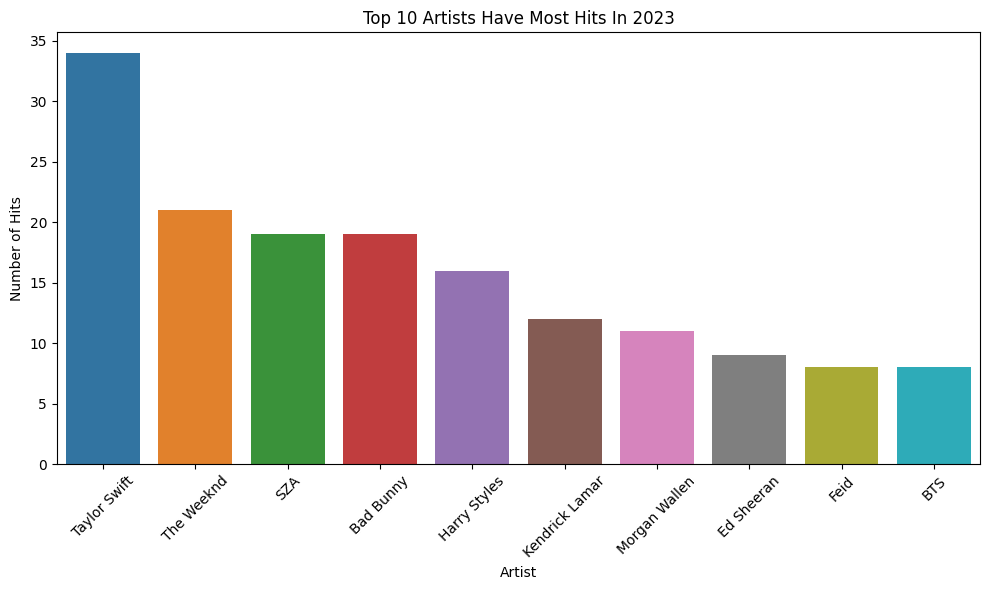

In [14]:
#count the number of songs released by each artist
artist_counts = clean_df['artist(s)_name'].value_counts()

#select the top 10 artists
top_artists = artist_counts.head(10)

#the barplot represents Top 10 Artists Have Most Streamed Songs in 2023
plt.figure(figsize = (10, 6))

sns.barplot(x = top_artists.index, y = top_artists.values)

plt.title('Top 10 Artists Have Most Hits In 2023')
plt.xlabel('Artist')
plt.ylabel('Number of Hits')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

One way we can improve upon this visualization is by adding meaning to the color. Lets create two visualizations, one which maps the color to the gender of each artist, and one that maps the color to the age of the artist. For BTS, we will use average age as this is a group.

For color, we will use baby pink (Hex #F4C2C2) and Baby Blue (Hex #89CFF0) as these colors are culturally and intuitively linked to gender. For age, we will use a light-dark continuum as this shows reletive age based on the delta

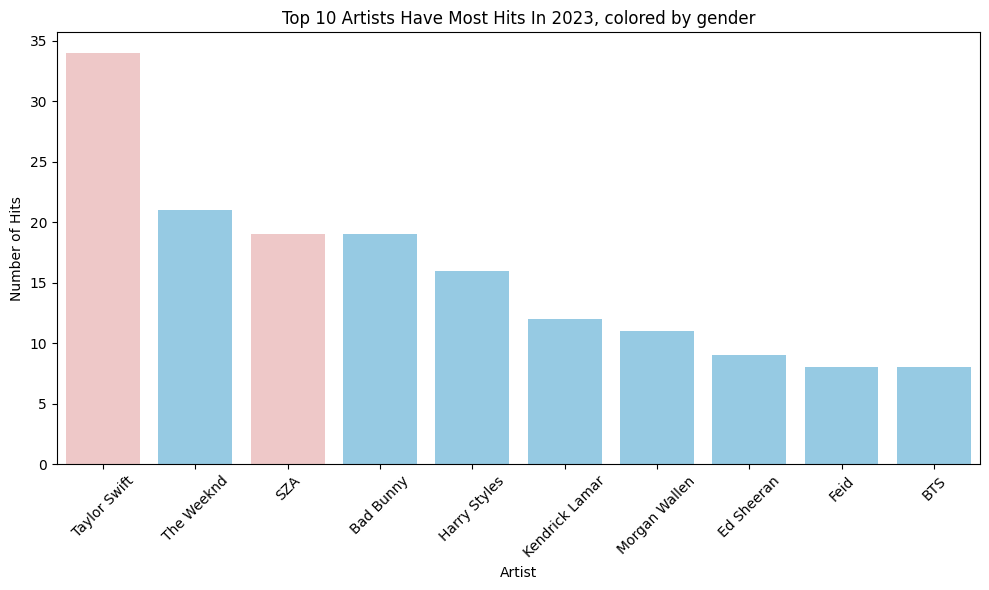

In [15]:
gender_CMAP = {
    "Taylor Swift": "#F4C2C2",
    "The Weeknd": "#89CFF0",
    "Bad Bunny": "#89CFF0",
    "SZA": "#F4C2C2",
    "Harry Styles":"#89CFF0",
    "Kendrick Lamar": "#89CFF0",
    "Morgan Wallen": "#89CFF0",
    "Ed Sheeran": "#89CFF0",
    "BTS": "#89CFF0",
    "Feid": "#89CFF0"
}
plt.figure(figsize = (10, 6))

sns.barplot(x = top_artists.index, y = top_artists.values, palette = gender_CMAP)

plt.title('Top 10 Artists Have Most Hits In 2023, colored by gender')
plt.xlabel('Artist')
plt.ylabel('Number of Hits')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Figure size 1000x600 with 0 Axes>

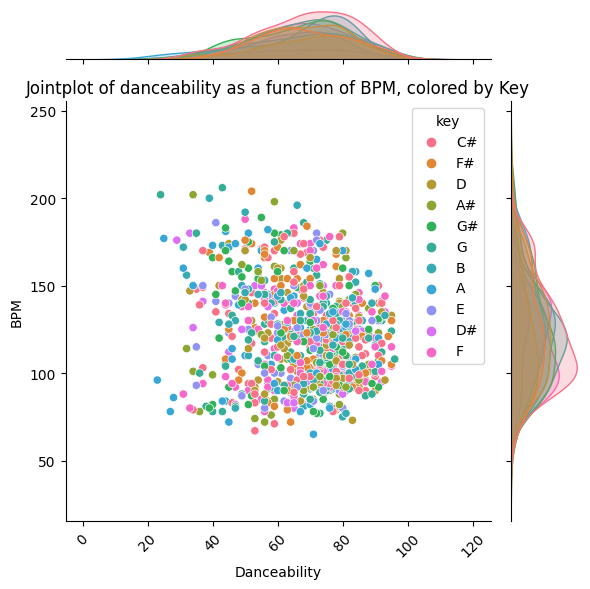

In [16]:
# BPM x Hits

#the barplot represents Top 10 Artists Have Most Streamed Songs in 2023
plt.figure(figsize = (10, 6))

sns.jointplot(x = clean_df['danceability_%'], y = clean_df['bpm'],hue = clean_df["key"])

plt.title('Jointplot of danceability as a function of BPM, colored by Key')
plt.xlabel('Danceability')
plt.ylabel('BPM')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Figure size 1000x600 with 0 Axes>

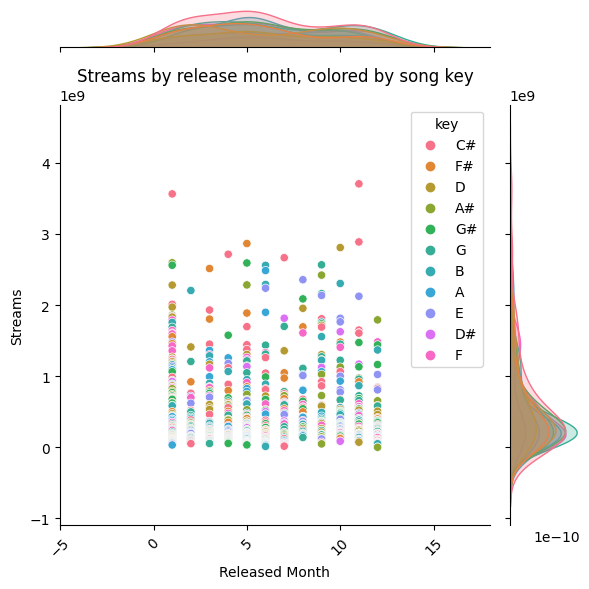

In [17]:
# BPM x Hits

#the barplot represents Top 10 Artists Have Most Streamed Songs in 2023
plt.figure(figsize = (10, 6))

sns.jointplot(x = clean_df['released_month'], y = clean_df['streams'],hue = clean_df["key"])

plt.title('Streams by release month, colored by song key')
plt.xlabel('Released Month')
plt.ylabel('Streams')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
#Get insights for later
top_artist_df = df[df["artist(s)_name"].isin(top_artists.index)]

highest_avg_dance = top_artist_df.groupby(['artist(s)_name'])['danceability_%'].agg('mean').sort_values(ascending=False)
print("Highest Average Danceability")
print(highest_avg_dance)


#ranges = top_artist_df.groupby(['artist(s)_name'])['danceability_%'].agg('range').sort_values(ascending=False)
ranges = top_artist_df.groupby(['artist(s)_name'])['danceability_%'].agg(
     ["min", "max", lambda x: x.max() - x.min()]).sort_values(by = "<lambda_0>",ascending=False)

print("Danceability Range by artist")
print(ranges)

#kurtosis_result = top_artist_df.groupby(['artist(s)_name'])['danceability_%'].apply(pd.Series.kurtosis).sort_values(ascending = False)
#print(kurtosis_result)

skew = top_artist_df.groupby(['artist(s)_name'])['danceability_%'].skew().sort_values(ascending=False)
print(skew)

Highest Average Danceability
artist(s)_name
Bad Bunny         75.157895
Feid              73.000000
Ed Sheeran        69.666667
BTS               67.125000
Kendrick Lamar    64.583333
Harry Styles      61.352941
Taylor Swift      59.764706
Morgan Wallen     58.909091
SZA               57.947368
The Weeknd        57.681818
Name: danceability_%, dtype: float64
Danceability Range by artist
                min  max  <lambda_0>
artist(s)_name                      
Kendrick Lamar   37   91          54
The Weeknd       27   80          53
SZA              36   82          46
Taylor Swift     34   80          46
Harry Styles     42   83          41
Bad Bunny        50   88          38
Ed Sheeran       50   83          33
Morgan Wallen    49   73          24
BTS              56   79          23
Feid             65   87          22
artist(s)_name
Feid              0.920437
Morgan Wallen     0.524686
SZA               0.267006
BTS               0.131463
Harry Styles      0.047472
Kendrick Lamar  

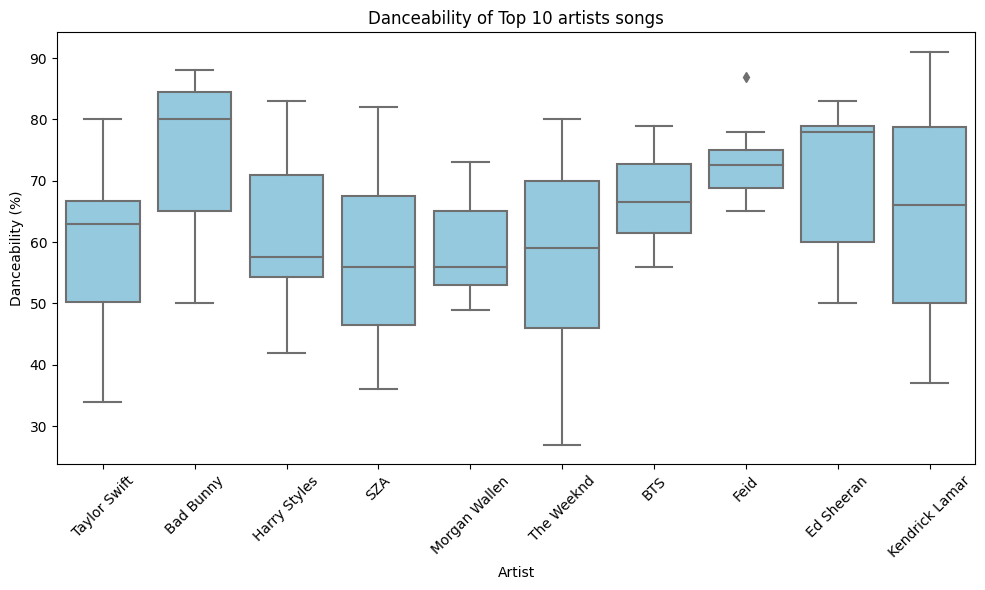

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')


In [19]:

plt.figure(figsize = (10, 6))

#sns.boxplot(x = top_artist_df["artist(s)_name"], y = clean_df['bpm'])
sns.boxplot(x = top_artist_df["artist(s)_name"], y = clean_df['danceability_%'],color="skyblue")

plt.title('Danceability of Top 10 artists songs')
plt.xlabel('Artist')
plt.ylabel('Danceability (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show() 

print(df.columns)

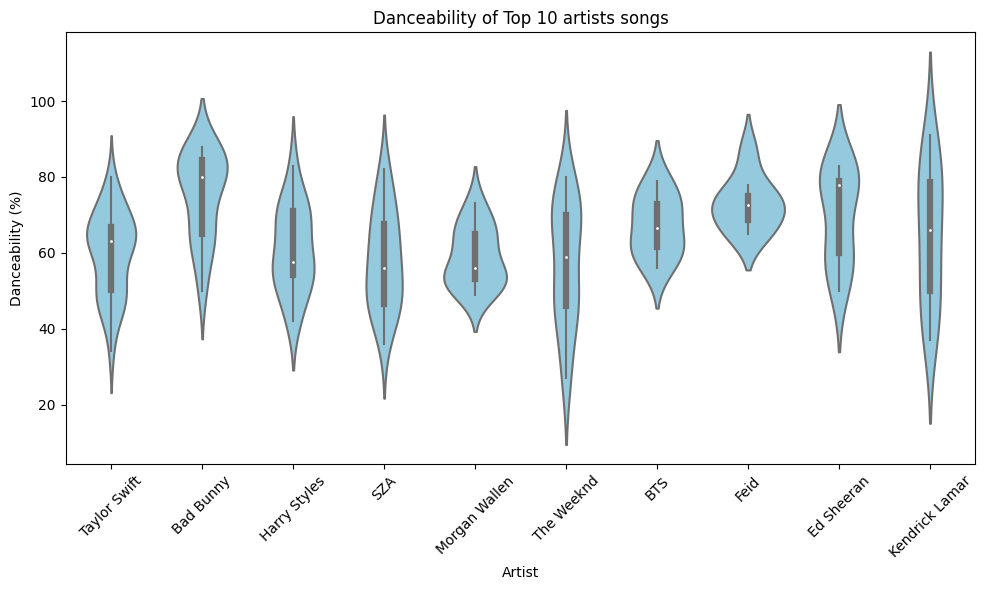

In [20]:
plt.figure(figsize = (10, 6))

#sns.boxplot(x = top_artist_df["artist(s)_name"], y = clean_df['bpm'])
sns.violinplot(x = top_artist_df["artist(s)_name"], y = clean_df['danceability_%'],color="skyblue")


plt.title('Danceability of Top 10 artists songs')
plt.xlabel('Artist')
plt.ylabel('Danceability (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


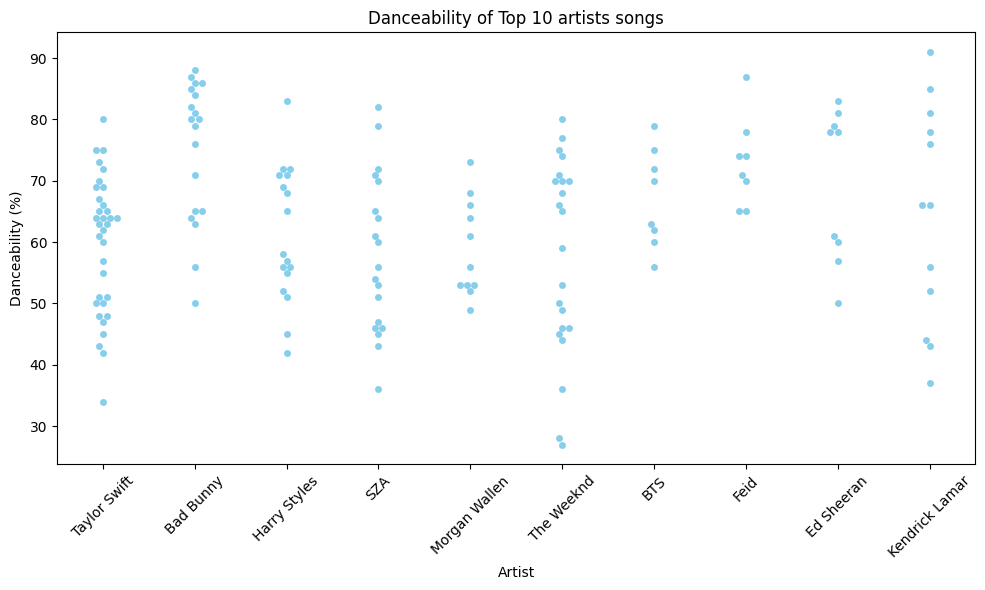

In [21]:
plt.figure(figsize = (10, 6))

#sns.boxplot(x = top_artist_df["artist(s)_name"], y = clean_df['bpm'])
sns.swarmplot(x = top_artist_df["artist(s)_name"], y = top_artist_df['danceability_%'],color="skyblue")

plt.title('Danceability of Top 10 artists songs')
plt.xlabel('Artist')
plt.ylabel('Danceability (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


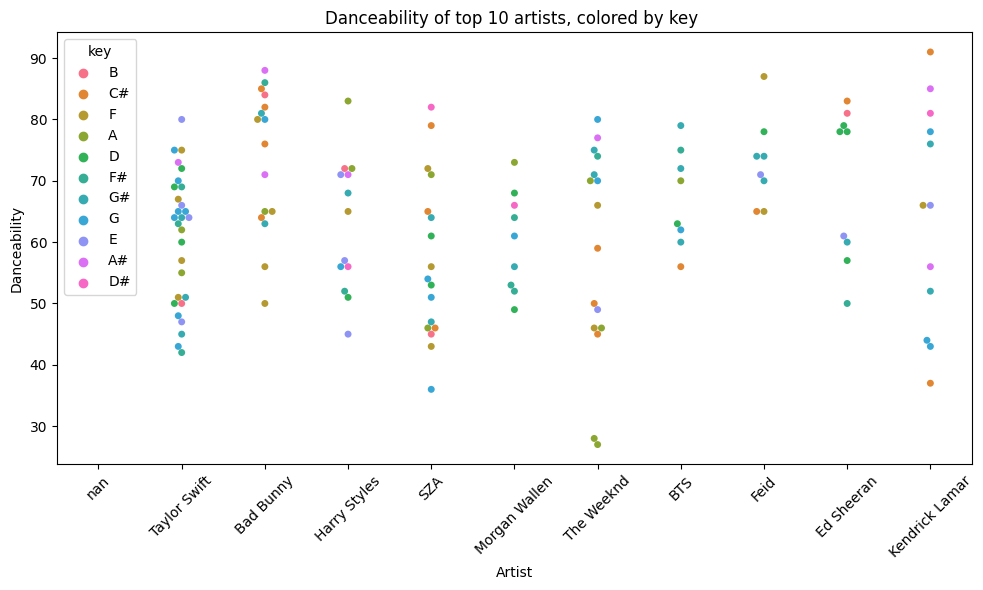

In [23]:
plt.figure(figsize = (10, 6))

#sns.boxplot(x = top_artist_df["artist(s)_name"], y = clean_df['bpm'])
sns.swarmplot(x = top_artist_df["artist(s)_name"], y = top_artist_df['danceability_%'],hue = clean_df['key'] )

plt.title('Danceability of top 10 artists, colored by key ')
plt.xlabel('Artist')
plt.ylabel('Danceability')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
